###Importing necessary libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time


### Creating the fake data


In [ ]:
np.random.seed(42)


def create_fake_data(num_samples,num_features):

  X = np.random.rand(num_samples,num_features)

  # make b_ij and C_ij ∈ [-1,1]  ∀ i,j

  b= np.random.rand(num_features)
  b=2*b -1

  C = np.random.rand(num_features,num_features)
  C = 2*C -1

  n = X.shape[0]
  m = X.shape[1]
  Y = np.zeros(n)


  for i in range(n):
      dot_product = np.dot(X[i], b)
      weighted_sum = np.sum(np.outer(X[i], X[i]) * C)
      Y[i] = dot_product + weighted_sum



  Y_min = np.min(Y)
  Y_max = np.max(Y)

  Y_scaled = (Y - Y_min) / (Y_max-Y_min)
  Y_scaled = 2*Y_scaled -1


  #Adding random noise from the uniform distribution

  noise  = np.random.uniform(-0.1,0.1,size =len(Y))

  Y_scaled_with_noise = Y_scaled+noise


  return X, Y_scaled_with_noise




X,Y = create_fake_data(10000,15)






### Data checking


In [ ]:
X

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.83244264, 0.21233911,
        0.18182497],
       [0.18340451, 0.30424224, 0.52475643, ..., 0.51423444, 0.59241457,
        0.04645041],
       [0.60754485, 0.17052412, 0.06505159, ..., 0.03438852, 0.9093204 ,
        0.25877998],
       ...,
       [0.73954394, 0.40129732, 0.25106086, ..., 0.04927807, 0.97416234,
        0.3840696 ],
       [0.27147308, 0.58976612, 0.90266196, ..., 0.40858045, 0.33912366,
        0.40834322],
       [0.86786314, 0.82778543, 0.96264237, ..., 0.19611519, 0.23209371,
        0.38049601]])

In [ ]:
Y


array([-0.6125842 ,  0.01821779,  0.00133631, ..., -0.17457979,
        0.1214358 , -0.14505835])

In [ ]:
X.shape


(10000, 15)

In [ ]:
Y.shape


(10000,)

In [ ]:
#random_state is used to shuffle the data before splitting it into training and testing sets.
#splitting the data , 60% for training and the rest 40% for test and validation.

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


In [ ]:
X_train.shape,Y_train.shape


((8000, 15), (8000,))

In [ ]:
X_val.shape,Y_val.shape


((1000, 15), (1000,))

In [ ]:
X_test.shape , Y_test.shape

((1000, 15), (1000,))

### The model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [ ]:
#Regularization parameter
lmbda = 0

# We use linear activation functoin at the output layer so the model would be able to predict also negative values.

model = Sequential([
    Dense(units=128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(lmbda)),
    Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(lmbda)),
    Dense(units=1, activation='linear', kernel_regularizer=regularizers.l2(lmbda)),
])


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.000008), loss="mean_squared_error")

In [ ]:
#These lines create empty lists train_accuracies ,val_accuracies and loss to store training and validation accuracies,and the loss as well.

train_accuracies = []
val_accuracies = []
train_losses = []


In [ ]:
# We consider a good prediction if | y_pred - y_real | <= 0.2
threshold = 0.2

In [ ]:

num_of_epochs =12


start_time = time.time()

for epoch in range(num_of_epochs):

    history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=1, verbose=0)

    Y_pred_train = model.predict(X_train)
    # Evaluate predictions at each epoch
    correct__test_pred = 0
    for i in range(len(Y_train)):
       if np.abs(Y_train[i] - Y_pred_train[i]) <=threshold:
            correct__test_pred +=1
    train_accuracy = correct__test_pred / len(Y_train)
    train_accuracies.append(train_accuracy)


    train_loss = history.history['loss'][0]
    train_losses.append(train_loss)




    Y_pred_val = model.predict(X_val)
    # Evaluate validation predictions
    correct_val_pred = 0
    for i in range(len(Y_val)):
        if np.abs(Y_val[i] - Y_pred_val[i]) <= threshold:
          correct_val_pred +=1

    val_accuracy = correct_val_pred / len(Y_val)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_of_epochs} - "
                 f"Training Accuracy: {train_accuracy * 100:.2f}% - "
                 f"Validation Accuracy: {val_accuracy * 100:.2f}%")





32/32 [==============================] - 0s 1ms/step
Epoch 1/12 - Training Accuracy: 52.01% - Validation Accuracy: 52.20%
32/32 [==============================] - 0s 1ms/step
Epoch 2/12 - Training Accuracy: 55.25% - Validation Accuracy: 55.60%
32/32 [==============================] - 0s 1ms/step
Epoch 3/12 - Training Accuracy: 58.14% - Validation Accuracy: 59.00%
32/32 [==============================] - 0s 1ms/step
Epoch 4/12 - Training Accuracy: 61.38% - Validation Accuracy: 61.40%
32/32 [==============================] - 0s 2ms/step
Epoch 5/12 - Training Accuracy: 64.88% - Validation Accuracy: 64.80%
32/32 [==============================] - 0s 2ms/step
Epoch 6/12 - Training Accuracy: 68.40% - Validation Accuracy: 68.90%
32/32 [==============================] - 0s 2ms/step
Epoch 7/12 - Training Accuracy: 72.32% - Validation Accuracy: 73.20%
32/32 [==============================] - 0s 2ms/step
Epoch 8/12 - Training Accuracy: 76.53% - Validation Accuracy: 76.80%
32/32 [=================

In [ ]:
end_time = time.time()
running_time_in_sec = round(end_time-start_time , 2)
print(f"Model runnning time in min = {round(running_time_in_sec/60,2)}")


Model runnning time in min = 0.39


### Plots

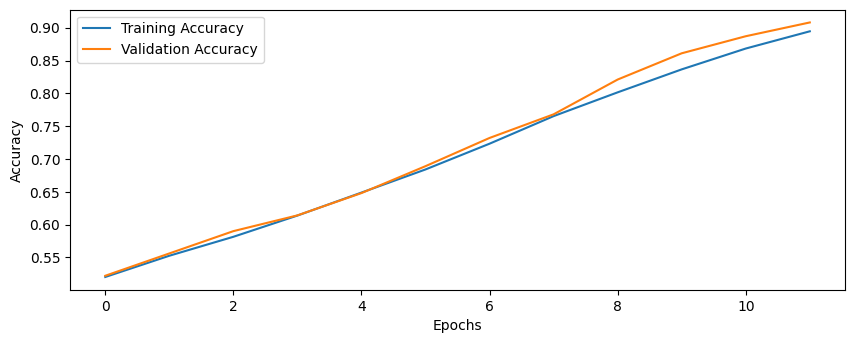

In [ ]:
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 1, 1)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


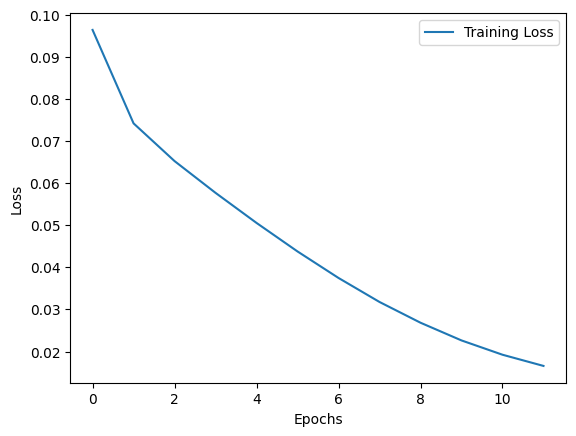

In [ ]:

    plt.plot(train_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



### Testing out model on unseen data


In [ ]:
test_predictions = model.predict(X_test)
correct_pred_test = 0

for i in range(len(Y_test)):
    if np.abs(Y_test[i] - test_predictions[i]) <= threshold:
        correct_pred_test += 1

total_examples_test = len(Y_test)
test_accuracy = correct_pred_test / total_examples_test

print(f"Test Accuracy: {test_accuracy:.2%}")

32/32 [==============================] - 0s 1ms/step
Test Accuracy: 89.00%


In [ ]:
test_predictions = test_predictions.flatten()
Y_test = Y_test.flatten()

In [ ]:
#comparing Y_predicted vs Y_test_real

import pandas as pd
df = pd.DataFrame({'Y_predicted': test_predictions, 'Y_test_real': Y_test})
df

,Y_predicted,Y_test_real
0,-0.089112,-0.119982
1,-0.135515,-0.213759
2,0.214103,0.206531
3,0.007839,0.063168
4,-0.133513,-0.257108
...,...,...
995,0.212025,0.268313
996,0.041510,0.032262
997,-0.141994,-0.164244
998,0.001530,0.021834
